# Convert PDF of gSlides to Images (PNG)
- store 'architectures.pdf' in /vertex-ai-mlops/slides
- store 'thumbnails.pdf' in /vertex-ai-mlops/thumbnails
- run this notebook in /vertext-ai-mlops/architectures
- slides are stored as slide_X.png in /vertext-ai-mlops/architectures/slides
- thumbnails are stored as tn_X.png in /vertext-ai-mlops/architectures/thumbnails (/plain, and /playbutton)

---
## Setup

In [1]:
!ls

'Create Images.ipynb'   notebooks   slides   thumbnails


In [2]:
!pip install pdf2image -q -U

In [5]:
!conda install -c conda-forge poppler -y -q

Solving environment: ...working... done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - poppler


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-cpp-1.74.0           |       h312852a_4        16.3 MB  conda-forge
    conda-4.10.3               |   py37h89c1867_2         3.1 MB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       hab24e00_0         1.9 MB  conda-forge
    fonts-conda-ecosystem-1    |                0           4 KB  conda-forge
    fonts-conda-forge-1        |                0           4 KB  conda-forge
    poppler-21.09.0            |       ha39eefc_3        17.1 MB  conda-forge
    popple

In [6]:
from pdf2image import convert_from_path

---
## Architectures.pdf

In [8]:
images = convert_from_path('slides/architectures.pdf',350)

In [9]:
for i, image in enumerate(images):
    if i > 0:
        image.save(f'slides/slide_{str(i).zfill(2)}.png')

---
## Thumbnails.pdf

In [10]:
images = convert_from_path('thumbnails/thumbnails.pdf', size=(1920, 1080))

/plain versions

In [11]:
for i, image in enumerate(images):
    if i > 0:
        image.save(f'thumbnails/plain/tn_{str(i).zfill(2)}.png')

/playbutton versions

In [38]:
from PIL import Image
import os

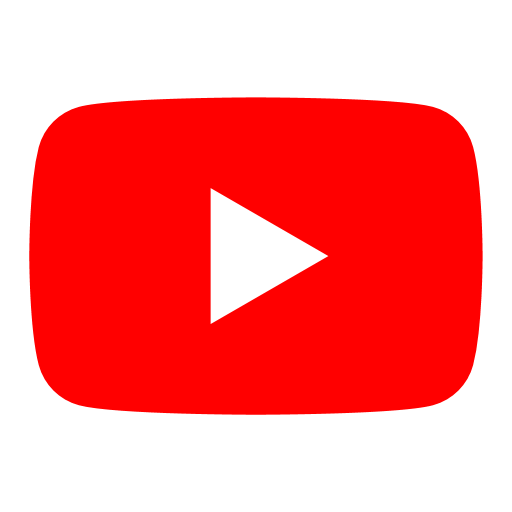

In [39]:
playbutton = Image.open('thumbnails/logo_youtube_color_1x_web_512dp.png').convert("RGBA")
pbWidth, pbHeight = playbutton.size
playbutton.show()

In [40]:
for filename in os.listdir('thumbnails/plain'):
    if not (filename.endswith('.png')):
        continue
    tn = Image.open(f'thumbnails/plain/{filename}')
    tnWidth, tnHeight = tn.size
    print(filename)
    tn.paste(playbutton, (int(tnWidth/2 - pbWidth/2), int(tnHeight/2 - pbHeight/2)), playbutton)
    tn.save(f'thumbnails/playbutton/{filename}')

tn_02.png
tn_01.png
tn_03.png
